## Notebook for implementing the Graph Based Ranking Algorithm

In [43]:
import pandas as pd 
import numpy as np 
import networkx as nx 
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from itertools import combinations
import re
import matplotlib.pyplot as plt

%matplotlib inline

https://www.youtube.com/watch?v=P8Kt6Abq_rM

In [265]:
text = """Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, 
and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of 
systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types."""

In [11]:
# from sklearn.feature_extraction.text import CountVectorizer

# vect = CountVectorizer(lowercase=True,stop_words='english')
# vect.fit(text)
# vect_matrix = vect.transform(text).toarray().astype(np.double)

# vect.get_feature_names()

# vect_matrix

In [283]:
def build_nextwork(text, split=5, threshold=2):
    text = re.sub("[^a-zA-Z]", " ", text)  # replace characters that are not a-z A-Z
    text = re.sub(" +", " ", text) # replace multiple spaces into one 
    text = text.lower().split(" ")  # split text into words
    words = set(text) - ENGLISH_STOP_WORDS - set([''])   # remove stopwords
    subsentences = []
    for i in range(len(text)):
        subsentences.append(text[i:i+split])  # generate subsentences based on split number, each subsentences will contain 5 words
    nodes = []   # list store network nodes 
    for i,j in combinations(words,2):
        cnt = 0
        for subsentence in subsentences:
            if (i in subsentence) and (j in subsentence):
                cnt+=1   # count comention of i and j in subsentences
        if cnt >= threshold:  # add i and j as nodes if comention number meet threshould
            nodes.append((i,j))
    ## generate network 
    G = nx.Graph()
    G.add_edges_from(nodes)  # creat graph 
    return G

In [284]:
G = build_nextwork(text)

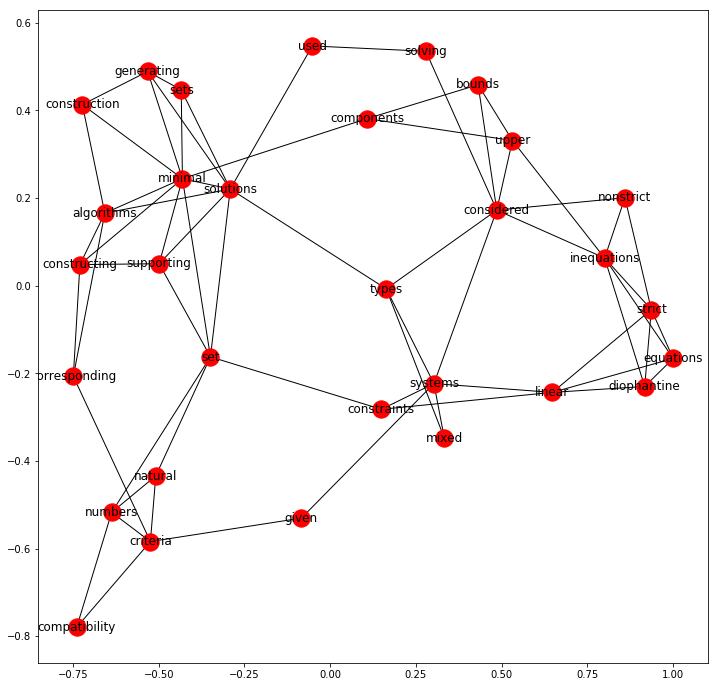

In [285]:
plt.figure(figsize=(12,12))
nx.draw_networkx(G)

In [288]:
class GraphBasedRanking:  
    '''
    implement Google's PageRank, also called TextRank algorithm in NLP area.
    '''
    def __init__(self, graph, damping_factor=0.85, iterations=100, eta=0.0001):  # initialize model
        self.graph = graph
        self.damping_factor = damping_factor
        self.iterations = iterations
        self.eta = eta
        self.nodes = list(self.graph.nodes)
        nodes_num = len(self.nodes)
        self.score = dict(zip(self.nodes, [1/nodes_num]*nodes_num))
    
    def fit(self):
        for i in range(self.iterations):
            last_score = np.array(list(self.score.values())).copy()
            for node in self.nodes:
                neighbors = list(self.graph.neighbors(node))
                tmp = sum([(1/len(list(self.graph.neighbors(c))))*self.score[c] for c in neighbors])   # get weighted sum of node's neighbors importance 
                self.score[node] = (1-self.damping_factor) + self.damping_factor*tmp
            convergence = np.mean(np.abs(last_score - np.array(list(self.score.values()))))
            if convergence <= self.eta:
                break
                
    def summarize(self, component_num = 5):
        rank = sorted(self.score.items(), key=lambda x:x[1], reverse=True)
        return [c[0] for c in rank[:component_num]]

In [295]:
test = GraphBasedRanking(G)
test.fit()
test.summarize(10)

['minimal',
 'solutions',
 'considered',
 'systems',
 'set',
 'inequations',
 'criteria',
 'linear',
 'algorithms',
 'strict']

In [294]:
pd.Series(nx.pagerank(G)).sort_values(ascending=False)

minimal          0.062977
solutions        0.057663
considered       0.053270
systems          0.046984
set              0.044460
inequations      0.043804
criteria         0.042381
linear           0.037391
algorithms       0.037066
strict           0.036918
numbers          0.033738
types            0.031852
upper            0.031548
constructing     0.030423
generating       0.030180
equations        0.030065
diophantine      0.030065
supporting       0.029677
natural          0.025513
bounds           0.024971
corresponding    0.024810
components       0.024565
constraints      0.024150
nonstrict        0.023789
construction     0.023501
sets             0.023326
solving          0.019487
used             0.019247
compatibility    0.019214
given            0.018701
mixed            0.018264
dtype: float64